<b> 1º Vetorização

Muitas vezes em computação cientifíca, aprendizado de máquinas e análise de dados, nós temos de executar operações em listas, vetores ou matrizes.

Por exemplo o somatório a seguir:

$\sum_{i=1}^N x_i$

In [10]:
X = [1, 4, 6]

In [11]:
# TODO: Fazer a versão iterative (não vetorizada) -> Phyton nativo
def soma(X):
    s = 0
    for x_i in X:
        s += x_i
    return s

soma(X)

11

In [12]:
# TODO: versão vetorizada utilizando função sum do python
sum(X)

11

In [14]:
# TODO: versão vetorizada com numpy
import numpy as np #padrao global de alias

np.sum(X)

11

In [16]:
X = np.random.randint(0, 1000, 10000000)

# TODO: Exibir o tempo de execução

#Funcao magica do IPy
%timeit soma(X) #1.18 s ± 49.2 ms per loop
%timeit sum(X) #977 ms ± 37.3 ms per loop
%timeit np.sum(X) #5.61 ms ± 123 µs per loop

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


1.18 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


977 ms ± 37.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.61 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Além do somatório, nós poderíamos querer elevar todos o números ao quadrado ou tirar o log deles. Na simbologia matemática seria assim, supondo que $X = \{x_1, ..., x_N\}$ seja um vetor com $N$ elementos. Queremos que $X^2 = \{x_1^2, x_2^2, x_3^2, ..., x_N^2\}$ e $\log(X) = \{\log(x_1), \log(x_2), \log(x_3), ..., \log(x_N)\}$.

Vamos ver como ficaria vetorizado.

In [18]:
X = [1, 4, 6]

In [20]:
# TODO: Fazer a versão iterative (não vetorizada)
def quadrado(X):
    r = []
    for x_i in X:
        r.append(x_i * x_i)
    return r

quadrado(X)

[1, 16, 36]

In [25]:
# TODO: Fazer a versão iterative (não vetorizada)
def quadrado_el(X):
    return [x_i * x_i for x_i in X] #for reduzido

quadrado_el(X)

[1, 16, 36]

In [22]:
# TODO: Fazer a versão iterative (não vetorizada)
def quadrado_map(X):
    return map(lambda x_i: x_i * x_i, X) #for reduzido

list(quadrado_map(X))

[1, 16, 36]

In [23]:
# TODO: versão vetorizada com numpy
import numpy as np

np.power(X,2)

array([ 1, 16, 36], dtype=int32)

In [27]:
%timeit quadrado(X) #487 ns ± 11.6 ns per loop 
%timeit quadrado_el(X) #462 ns ± 17 ns per loop
%timeit quadrado_map(X) #355 ns ± 0.918 ns per loop
%timeit np.power(X,2) #2.84 µs ± 101 ns per loop

487 ns ± 11.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
462 ns ± 17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
355 ns ± 0.918 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.84 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<b> 2º Ndarray

### Numpy

Numpy é uma biblioteca (pacote python) que prove varias funções numéricas para trabalhamos eficientemente com array multidimensionais homogeneos. Esse array é uma tabela de elementes (geralmente de numeros), todos no mesmo tipo, indexados por uma tupla de inteiros positivos. No NumPy dimensões são chamadas de eixos (axes).

Um exemplo de array multimensional de pontos flutuante.

In [29]:
[[ 1., 0., 0.],
 [ 0., 1., 2.]]

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]

 Tipo do array do numpy é chamdo de ndarray. Os atributos mais importantes de um objeto do tipo ndarray são:

- ndrray.ndim

número de dimensões (eixos) que o array possui

- ndarray.shape

os valores das dimensões (eixos) do array. Por exemplo, uma matrix com n linhas e m colunas terá o shape = (n, m).

- ndarray.size

Total de elementos no array. É equivalente ao produto dos elementos do shape.

- ndarray.dtype

O tipo dos elementos armazenados no array.

- ndrray.itemsize

Tamanho em bytes de cada elemento no array.

- ndarray.data

Um buffer contendo realmente os elementos do array. Geralemente, não precisamos acessá-lo diretamente, pois utilizaremos o mecanismo de indexição que veremos a seguir.

<b> Exemplo

In [31]:
import numpy as np

# criando um ndarray a partir de uma lista
a = np.array([1, 2, 3, 4, 5, 6])

# cria um array 2D com 15 elementos de 0 a 14
# com 3 linhas e 5 colunas
#arange = range
b = np.arange(15).reshape(3, 5)

print("a : ", a, "dims: ", a.ndim)

print("b : ", b, "dims: ", b.ndim)

# tipo dos elementos no array
print(a.dtype)

# convertendo para float
print(b.astype(float).dtype)

print(type(a))

a :  [1 2 3 4 5 6] dims:  1
b :  [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] dims:  2
int32
float64
<class 'numpy.ndarray'>


<b> Criando array

Há varias formas de criar um ndarray.

Por exemplo, você pode criar a partir de uma lista ou tupla Python com a função array. O tipo dos elementos será inferido a partir do elementos na lista.

In [35]:
import numpy as np

a = np.array([2, 3.4, 4])

print(a, a.dtype)

a = np.array([2, 3, 4])
a = np.array([2, 3, 4,'TXT']) #Não da erro, mas converte os valores todos para String

#Relevância na conversão (String->Float->Int->Boolean)

print(a, a.dtype)

[2.  3.4 4. ] float64
['2' '3' '4' 'TXT'] <U11


Um erro frequente é chamar a função array com múltiplos argumentos, ao invés de passar apenas uma única lista de elementos.

In [37]:
# descomente para testar
#a = np.array(1,2,3,4) # errado
a = np.array([1,2,3,4]) # certo

In [38]:
#np.array? --> Documentação da função

In [39]:
a = [(1., 0., 0),
     (0., 1., 2.)]
b = np.array(a)
b

array([[1., 0., 0.],
       [0., 1., 2.]])

In [46]:
a = [(1., 0., 0),
     (0., 1., 2.)]
# explicitamente falando qual é o tipo dos elementos
b = np.array(a, dtype=complex)
print('Complex:',b)

c = np.array(a, dtype=float)
print('Float: ',c)

Complex: [[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 2.+0.j]]
Float:  [[1. 0. 0.]
 [0. 1. 2.]]



Geralmente, nós sabemos as dimensões do array, porém não sabemos seu valor. O Numpy nos ofere funções para criar arrays pre-preenchidos com valores padrões

In [51]:
# array apenas com zeros
# recebe como parametro o shape
# shape sempre é uma tupla
print(np.zeros((3, 4)))

# array apenas de uns
print(np.ones((3)))

# array não inicializado 
# (apenas lixos, valores podem sofre alteraco)
print(np.empty((1,2,10)))

%timeit np.zeros((3, 4)) #334 ns ± 8.08 ns per loop
%timeit np.ones((3, 4)) #1.6 µs ± 23.5 ns per loop
%timeit np.empty((3, 4)) #335 ns ± 24.4 ns per loop - Não recomendado

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1. 1.]
[[[3.03013855e-312 6.27463370e-322 0.00000000e+000 0.00000000e+000
   1.37959197e-306 5.30276956e+180 5.05117710e-038 4.57752921e-071
   3.66039864e-086 3.35559333e-143]
  [6.01433264e+175 6.93885958e+218 5.56218858e+180 3.94356143e+180
   1.48643567e-076 1.04852210e+165 6.22693689e+174 1.26708776e-071
   7.49577952e-144 1.50008929e+248]]]
326 ns ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.45 µs ± 44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
298 ns ± 14.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [59]:
print(np.ones((3)) * range(3))
a = 10+ np.random.rand(3) #randomico considerando um valor inicial
print(a)
%timeit 10 + np.random.rand(3) #2.54 µs ± 95.1 ns per loop

[0. 1. 2.]
[10.26684371 10.67292248 10.36156456]
2.54 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<b>Criando sequências de números (arange)

A função arange sequências numéricas assim como a range do Python.

In [86]:
print(np.arange(10, 30, 5))

#Tabuada
#print(np.arange(1, 10))
#print(np.arange(0, 21, 2))

print('Tabuada')
for i in range(10):
    print(i+1,':',np.arange(0, (i+1) * 11, i+1))

# também aceita float
print(np.arange(0, 10, 0.5))

[10 15 20 25]
Tabuada
1 : [ 0  1  2  3  4  5  6  7  8  9 10]
2 : [ 0  2  4  6  8 10 12 14 16 18 20]
3 : [ 0  3  6  9 12 15 18 21 24 27 30]
4 : [ 0  4  8 12 16 20 24 28 32 36 40]
5 : [ 0  5 10 15 20 25 30 35 40 45 50]
6 : [ 0  6 12 18 24 30 36 42 48 54 60]
7 : [ 0  7 14 21 28 35 42 49 56 63 70]
8 : [ 0  8 16 24 32 40 48 56 64 72 80]
9 : [ 0  9 18 27 36 45 54 63 72 81 90]
10 : [  0  10  20  30  40  50  60  70  80  90 100]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


Quando utilizamos arange com float, muitas vezes é impossível saber quantos elementos a sequência vai ter. Portanto, é preferível utiliar a função linspace, com a qual nós passamos o número de elementos ao invés do passo:

In [90]:
np.linspace(0, 9.5, 100) #Utilizado com frequencia para calibrar modelo de IA
#Ficara mais claro nas aulas de IA

array([0.        , 0.0959596 , 0.19191919, 0.28787879, 0.38383838,
       0.47979798, 0.57575758, 0.67171717, 0.76767677, 0.86363636,
       0.95959596, 1.05555556, 1.15151515, 1.24747475, 1.34343434,
       1.43939394, 1.53535354, 1.63131313, 1.72727273, 1.82323232,
       1.91919192, 2.01515152, 2.11111111, 2.20707071, 2.3030303 ,
       2.3989899 , 2.49494949, 2.59090909, 2.68686869, 2.78282828,
       2.87878788, 2.97474747, 3.07070707, 3.16666667, 3.26262626,
       3.35858586, 3.45454545, 3.55050505, 3.64646465, 3.74242424,
       3.83838384, 3.93434343, 4.03030303, 4.12626263, 4.22222222,
       4.31818182, 4.41414141, 4.51010101, 4.60606061, 4.7020202 ,
       4.7979798 , 4.89393939, 4.98989899, 5.08585859, 5.18181818,
       5.27777778, 5.37373737, 5.46969697, 5.56565657, 5.66161616,
       5.75757576, 5.85353535, 5.94949495, 6.04545455, 6.14141414,
       6.23737374, 6.33333333, 6.42929293, 6.52525253, 6.62121212,
       6.71717172, 6.81313131, 6.90909091, 7.00505051, 7.10101

<b>Operações basicas

As operações aritiméticas são aplicadas elemento a elemento. Como resultado um novo arry é criado preenchido com os valores resultantes.

<b>Arrays e Escalares

In [92]:
# array
a = np.array([1, 2, 3])

# escalar
b = 2

print("{} * {} = {}".format(b, a, b * a))
print("{} + {} = {}".format(b, a, b + a))
print("{} - {} = {}".format(b, a, b - a))
print("{} / {} = {}".format(b, a, b / a))
print("{} ** {} = {}".format(b, a, b ** a))

2 * [1 2 3] = [2 4 6]
2 + [1 2 3] = [3 4 5]
2 - [1 2 3] = [ 1  0 -1]
2 / [1 2 3] = [2.         1.         0.66666667]
2 ** [1 2 3] = [2 4 8]


In [98]:
#Phython nativo
print([1,2.3] * 3) #Nao multiplica e sum duplcia
print(list(map(lambda x: x * 3,[1,2,3]))) # No Numpy apenas multiplica o vetor

[1, 2.3, 1, 2.3, 1, 2.3]
[3, 6, 9]


<b> Entre arrays

In [99]:
c = np.array([10, 2, 5])

print("{} * {} = {}".format(a, c, a * c))
print("{} + {} = {}".format(a, c, a + c))
print("{} - {} = {}".format(a, c, a - c))
print("{} / {} = {}".format(a, c, a / c))
print("{} % {} = {}".format(a, c, a % c))
print("{} ** {} = {}".format(a, c, a ** c))

[1 2 3] * [10  2  5] = [10  4 15]
[1 2 3] + [10  2  5] = [11  4  8]
[1 2 3] - [10  2  5] = [-9  0 -2]
[1 2 3] / [10  2  5] = [0.1 1.  0.6]
[1 2 3] % [10  2  5] = [1 0 3]
[1 2 3] ** [10  2  5] = [  1   4 243]


<b>Funções elemento a elemento (element-wise)

In [100]:
print("np.log({}) = {}".format(c, np.log(c)))
print("np.sqrt({}) = {}".format(c, np.sqrt(c)))

np.log([10  2  5]) = [2.30258509 0.69314718 1.60943791]
np.sqrt([10  2  5]) = [3.16227766 1.41421356 2.23606798]


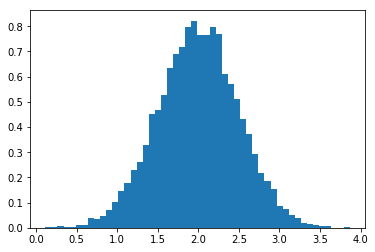

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

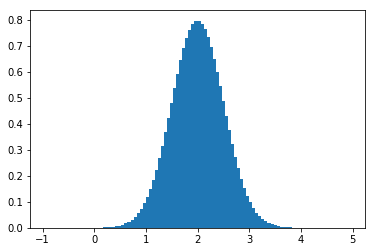

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,100000000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=100, normed=1)       # matplotlib version (plot)
plt.show()

https://docs.scipy.org/doc/numpy/user/quickstart.html

https://docs.scipy.org/doc/numpy/reference/routines.html

http://www.numpy.org/

<b> Exercício

Muitas vezes quando estamos criando nossos modelos é preciso definir uma métrica para nós os avaliarmos e escolher o melhor dentre eles. Algumas vezes, nós mesmo temos de implementá-las, portanto, nesse exercício você vai ter de implementar a métrica Erro Quadrático Médio, em inglês Mean Squared Error (MSE).

A MSE é deifnida como:

$\epsilon = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2$

onde:

- $\epsilon$ é o valor do erro (score)
- $n$ é o total de exemplos no conjunto de dados testado
- $\hat{y}_i$ é a predição do modelo
- $y_i$ é o valor do real (rótulo)
- $\frac{1}{n}\sum_{i=1}^{n}$ é a média
- $(\hat{y}_i - y_i)^2$ são os erros quadráticos

In [129]:
import math

def MSE(y_true, y_pred):
    """ Mean Squared Error 
    Parâmetros
    ----------
    y_true : 1d array
        Rótulos.
    y_pred : 1d array
        Predições, retornadas pelo modelo.
    """
    n = len(y_true)
    soma = 0
    for i in range(n):
        soma += (y_pred[i] - y_true[i])**2
    return soma / n


def vMSE(y_true, y_pred):
    """vectorized Mean Squared Error 
    Parâmetros
    ----------
    y_true : 1d array
        Rótulos.
    y_pred : 1d array
        Predições, retornadas pelo modelo.
    """
    # TODO: versão vetorizada do RMSLE
    n = y_true.shape[0]   
    return np.mean((y_pred - y_true)**2)   
    

y_true =  np.arange(1000000) + 1
y_pred = y_true - np.random.rand(y_true.shape[0])

print('1',MSE(y_true, y_pred))
print('2',vMSE(y_true, y_pred))

%timeit MSE(y_true, y_pred) #935 ms ± 31.7 ms per loop
%timeit vMSE(y_true, y_pred) #13.9 ms ± 159 µs per loop

1 0.33348087107142566
2 0.3334808710714239
935 ms ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.9 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [131]:
935/13.9

67.2661870503597

<b> Aula - Indexação, Slicing e Iteração

In [22]:
import numpy as np

a = np.arange(10)**2

print(a)

print(a[4])

print(a[5:])

print(a[::2]) # de 2 em dois

print(a[::-1]) # invertendo

[ 0  1  4  9 16 25 36 49 64 81]
16
[25 36 49 64 81]
[ 0  4 16 36 64]
[81 64 49 36 25 16  9  4  1  0]


In [23]:
a = (np.arange(16)**2).reshape((4, 4))

print(a)

# elemento da linha 0 e coluna 1
print(a[0, 1])

print(a[:3, 0]) # elementos da linha 0 a 2 da coluna 0

print(a[:1, 0]) # todos elementos da coluna 0

print(a[-1]) # equivalente a a[-1, :]

[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]]
1
[ 0 16 64]
[  0  16  64 144]
[144 169 196 225]


In [24]:
for linha in a:
    print(linha)

[0 1 4 9]
[16 25 36 49]
[ 64  81 100 121]
[144 169 196 225]


In [26]:
for coluna in a.T:
    print(coluna)

[  0  16  64 144]
[  1  25  81 169]
[  4  36 100 196]
[  9  49 121 225]


<b> Manipulação do Shape

In [42]:
a = (np.arange(16)**2).reshape((4, 4)) # Matrix com até 4 colunas

print(a)

# flattened array
print(a.ravel())
print(a.reshape(-1))
print(a.reshape(2,8))
print(a.reshape(8,2))

# Gera erro se não tratar todos os elementos do array
# retorna array com novo formato
print(a.reshape(8,2))
a.shape = (8,2)

print(a)

# transposta
print(a.T)

#Indexação realizada por linha
print(a.ravel())
a.ravel().reshape(8,2)

[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225]
[[  0   1   4   9  16  25  36  49]
 [ 64  81 100 121 144 169 196 225]]
[[  0   1]
 [  4   9]
 [ 16  25]
 [ 36  49]
 [ 64  81]
 [100 121]
 [144 169]
 [196 225]]
[[  0   1]
 [  4   9]
 [ 16  25]
 [ 36  49]
 [ 64  81]
 [100 121]
 [144 169]
 [196 225]]
[[  0   1]
 [  4   9]
 [ 16  25]
 [ 36  49]
 [ 64  81]
 [100 121]
 [144 169]
 [196 225]]
[[  0   4  16  36  64 100 144 196]
 [  1   9  25  49  81 121 169 225]]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225]


array([[  0,   1],
       [  4,   9],
       [ 16,  25],
       [ 36,  49],
       [ 64,  81],
       [100, 121],
       [144, 169],
       [196, 225]], dtype=int32)

In [48]:
n_rows = 8
n_cols = 2

row = 5
col = 0
a.ravel()[n_cols*row + col]

4

<b>Truques de Indexação

NumPy oferece mais opções de indexação do que Python. Além da indexação por inteiros e slices, como vimos anteriormente, arrays podem ser indexados por outros arrays de inteiros e booleanos.

In [49]:
a = np.arange(12)**2                      
indices = np.array([1, 1, 6, 3, 5])

print(a[indices])

bidim_indices = np.array([[1, 6], [3, 5]])

print(bidim_indices)
print(a[bidim_indices])

[ 1  1 36  9 25]
[[1 6]
 [3 5]]
[[ 1 36]
 [ 9 25]]


Quando estamos indexando um array multimensional, um único array de indices refere-se a primeira dimensão de a.

In [50]:
a = (np.arange(21)**2).reshape((7, 3))

print(a)

bidim_indices = np.array([[1, 0], [2, 6]])

a[bidim_indices]

[[  0   1   4]
 [  9  16  25]
 [ 36  49  64]
 [ 81 100 121]
 [144 169 196]
 [225 256 289]
 [324 361 400]]


array([[[  9,  16,  25],
        [  0,   1,   4]],

       [[ 36,  49,  64],
        [324, 361, 400]]], dtype=int32)

In [56]:
# tem de ter o mesmo tamanho
id_linhas = np.array([0, 1, 5])
id_colunas = np.array([2, 1, 1])

#print(a)

print(a[id_linhas, id_colunas])
print(a[:, [0,2]]) #Apenas o Numpy prove essa facilidade de considear colunas ou linhas para um novo obj

[  4  16 256]
[[  0   4]
 [  9  25]
 [ 36  64]
 [ 81 121]
 [144 196]
 [225 289]
 [324 400]]


<b>Indexando com booleanos

In [57]:
b = a > 200 #filtro no vetor

print(b)

a[b] #Desta forma acessa os valores

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [ True  True  True]
 [ True  True  True]]


array([225, 256, 289, 324, 361, 400], dtype=int32)

In [58]:
# pode ser util para atribuição de valores
a[b] = 0 #Atribui 0 para os indices na condição acima de 200 (celula acima)
a

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121],
       [144, 169, 196],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=int32)

<b> Concatenação

In [59]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.arange(7, 10)

print("a : ", a)
print("b : ", b)
print("c :", c)

a :  [1 2 3]
b :  [4 5 6]
c : [7 8 9]


In [66]:
print(np.concatenate((a,b)))
print(np.concatenate((b,a)))

print(np.concatenate((a, b, c)))

print(np.concatenate((b, a, a, b, a, a, b, b))) #Recebe uma lista/tupla de arrays e não pode ser passado como argumentos
#print(np.concatenate(b, a, a, b, a, a, b, b)) # Erro

[1 2 3 4 5 6]
[4 5 6 1 2 3]
[1 2 3 4 5 6 7 8 9]
[4 5 6 1 2 3 1 2 3 4 5 6 1 2 3 1 2 3 4 5 6 4 5 6]


<b> Concatenando matrizes

In [68]:
a = np.floor(10*np.random.random((2,2)))

print(a)

b = np.floor(10*np.random.random((2,2)))

print(b)

[[0. 0.]
 [4. 8.]]
[[0. 6.]
 [0. 3.]]


In [71]:
# Equivalente a np.vstack((a,b))
print(np.concatenate((a,b), axis=0)) # Se não ter o mesmo tamanho dos eixos devem ser iguais

# Equivalente a np.hstack((a,b))
print(np.concatenate((a,b), axis=1)) # Para horizontal não necessário mesmo tamanho dos eixos

[[0. 0.]
 [4. 8.]
 [0. 6.]
 [0. 3.]]
[[0. 0. 0. 6.]
 [4. 8. 0. 3.]]


In [72]:
print(np.vstack((a,b)))
print(np.hstack((a,b)))

[[0. 0.]
 [4. 8.]
 [0. 6.]
 [0. 3.]]
[[0. 0. 0. 6.]
 [4. 8. 0. 3.]]


In [74]:
%timeit np.vstack((a,b)) #4.04 µs ± 519 ns per loop
%timeit np.concatenate((a,b), axis=0) #1.73 µs ± 58.4 ns per loop

4.04 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.73 µs ± 58.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<b> Cópias

Nunca é criado uma cópia do array implicitamente. - São passadas por <b> referencia

In [78]:
#Exemplo

a = np.arange(12)

b = a

print(a is b, id(b), id (a))

b.shape = 3,4 #Altera nos dois elementos
a.shape

True 306615244080 306615244080


(3, 4)

Python passa objetos mutaveis como referência, portanto a chamada de uma função não faz cópia.

In [80]:
def f(x):
    print(id(x.copy)) #Cópia explicita
    
print(id(a))
f(a)

306615244080
306615489808


Sclicing retorna uma view do array. Views são novos objetos do tipo ndarray que apontam para o mesmo dado

In [84]:
s = a[:, 1:3].copy() #Só realiza a cópia quando de fato é necessário
s[:] = 10      
print(a,s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[10 10]
 [10 10]
 [10 10]]


Portanto, é necessário fazer cópias explicitamente (quando desejado) através do método copy.

In [86]:
# um novo objeto com um novo data é criado
d = a.copy()       

print(d is a)
# não compartilha nada com a
print(d.base is a) #comparação da base, se compartilham a mesma

d[0,0] = 9999
print(d)
a

False
False
[[9999    1    2    3]
 [   4    5    6    7]
 [   8    9   10   11]]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

<b> Algebra Linear </b>

Links: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.linalg.html e https://docs.scipy.org/doc/scipy/reference/linalg.html

In [1]:
import numpy as np

a = np.array([[1.0, 2.0], [3.0, 4.0]])
a

array([[1., 2.],
       [3., 4.]])

In [8]:
a.transpose()

a.T #Tammbém pode ser utilizado

array([[1., 3.],
       [2., 4.]])

In [4]:
# matriz inversa
np.linalg.inv(a)

%timeit np.linalg.inv(a) #7.84 µs ± 459 ns per loop 

7.84 µs ± 459 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
# matriz identidade nxn
n = 10

%timeit np.eye(n)      #1.98 µs ± 60.4 ns per loop
%timeit np.identity(n) #3.29 µs ± 395 ns per loop

np.eye(n)
np.identity(n)

1.98 µs ± 60.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.29 µs ± 395 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [23]:
print(np.eye(2, dtype=int))
print("")
print(np.eye(10, k=-1))

[[1 0]
 [0 1]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Lembre-se que $A.A^{-1} = I$ Matriz vezes Matriz inversa é igual a identidade da MATRIZ

In [32]:
# multiplicaco de matriz
b = np.array([[2, 0], [0, 1]])

np.dot(b, np.linalg.inv(b)) # ~I (É aproximado, pois não é exato, ou arredando os valores, mas pode ser considerado como correto)

array([[1., 0.],
       [0., 1.]])

In [33]:
# autovalores e autovetores, respectivamente
np.linalg.eig(a)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

<b> Exercício

Agora que demos uma boa pincelada sobre o numpy, vou propor um desafio para você.

Vamos supor que estamos querendo predizer o valor do aluguel de um imóveis e temos 1 atributo do mesmo (i.e., área construída). Utilizando as funções do numpy faça uma função que encontre os coeficientes da reta que melhor se ajuste aos dados, isso nada mais é do que a regressão linear. Um método clássico utilzado para isso é o método dos mínimos quadrados, esse método possui uma fórmula analítica para encontrar o coeficiente da reta, e que é definida do seguinte modo:

$w = (X^TX)^{-1}X^Ty$

onde:

- $X$ é a matriz que representa nosso conjuntos de pontos (cada linha é um vetor multidimensional que representa um ponto no espaço n-D)
- $y$ é o valor desse ponto

Portanto, o objetivo é implementar uma função que retorne o vetor de coefientes $w$.

In [39]:
X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis]
w = 2000
y = X * (w - np.random.normal(0, 100, X.shape[0]))[:, np.newaxis]

In [45]:
def ajustar(X, y):
    # TODO: seu código
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    #Tentativa return (np.dot(X, np.linalg.inv(X.T)))+np.dot(X.T, np.linalg.inv(y))

In [48]:
r = ajustar(X,y) 
r

array([[1994.287902]])

In [49]:
import numpy as np
series = [[23,45,12,679], [14,48,69,38]]
new_series = np.array(series)
print(new_series.ndim)
print(new_series.shape)

2
(2, 4)


In [52]:
import numpy as np
dataset = np.array(['paul', 'jacob', 'vince', 'paul', 'miky', 'larence', 'warren'])
print(dataset == 'paul')

[ True False False  True False False False]


In [111]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#arr[(arr % 2).astype(bool)] = -1 #Impares
#arr[1::2] = -1 #Impares


arr[arr % 2 == 0] = -1 #escolhida 1º vez        array([-1,  1, -1,  3, -1,  5, -1,  7, -1,  9])
#arr[::2] = -1 #OK                              array([-1,  1, -1,  3, -1,  5, -1,  7, -1,  9])
#arr[np.arange(0, arr.shape[0], 2)] = -1 # OK - array([-1,  1, -1,  3, -1,  5, -1,  7, -1,  9])
arr

array([-1,  1, -1,  3, -1,  5, -1,  7, -1,  9])

In [115]:
arr = np.array([80, 10, 50, 30])

def normaliza(arr):
    #return arr /arr.min() #[8. 1. 5. 3.]
    
    #return arr /arr.max() # [1.    0.125 0.625 0.375]
    #return (arr - arr.min()) / (arr.max() - arr.min()) #[1.         0.         0.57142857 0.28571429]
    #return arr /arr.sum() #[0.47058824 0.05882353 0.29411765 0.17647059]

    # o que deve ser retornado
    # para que os valores de arr
    # fiquem compreendido entre 0 e 1

print(normaliza(arr)) # saída esperada: array([0.47, 0.06, 0.29, 0.18])

#return arr /arr.max() # [1.    0.125 0.625 0.375]
#return (arr - arr.min()) / (arr.max() - arr.min()) #[1.         0.         0.57142857 0.28571429]
#return arr /arr.sum() #[0.47058824 0.05882353 0.29411765 0.17647059]

[1.    0.125 0.625 0.375]


In [118]:
import numpy as np
valores = np.array([80, 10, 50, 30])
pesos = np.array([2, 5, 1, 1])

print(np.average(valores, weights=pesos)) #Escolher este
print(np.sum(valores*pesos) / np.sum(pesos)) #Escolher este

print(np.mean(valores*pesos))
print(np.average(valores*pesos))
print(np.sum(valores*pesos)/valores.shape[0])

32.22222222222222
32.22222222222222
72.5
72.5
72.5


In [119]:
a = np.zeros(10)+4
b = np.ones(10)*4
print(a,b)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
